In [1]:
import deepxde as dde
import numpy as np

No backend selected.
Finding available backend...



Using backend: tensorflow.compat.v1
Other supported backends: tensorflow, pytorch, jax, paddle.
paddle supports more examples now and is recommended.


Found tensorflow.compat.v1
Setting the default backend to "tensorflow.compat.v1". You can change it in the ~/.deepxde/config.json file or export the DDE_BACKEND environment variable. Valid options are: tensorflow.compat.v1, tensorflow, pytorch, jax, paddle (all lowercase)

Instructions for updating:
non-resource variables are not supported in the long term


In [3]:
def func(x):
    """
    x: array_like, N x D_in
    y: array_like, N x D_out
    """
    return x * np.sin(5 * x)
geom = dde.geometry.Interval(-1, 1)

In [4]:
num_train = 16
num_test = 100
data = dde.data.Function(geom, func, num_train, num_test)

In [8]:
activation = "tanh"
initializer = "Glorot uniform"
net = dde.nn.FNN([1] + [20] * 3 + [1], activation, initializer)

In [9]:
model = dde.Model(data, net)
model.compile("adam", lr=0.001, metrics=["l2 relative error"])

Compiling model...
Building feed-forward neural network...



c:\Users\nn7fr\anaconda3\Lib\site-packages\deepxde\nn\tensorflow_compat_v1\fnn.py:116: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(


'build' took 0.230739 s


'compile' took 0.399065 s



In [10]:
losshistory, train_state = model.train(iterations=10000)

Training model...

Step      Train loss    Test loss     Test metric   
0         [2.99e-01]    [2.59e-01]    [1.11e+00]    
1000      [1.57e-04]    [1.69e-04]    [2.84e-02]    
2000      [4.27e-05]    [7.30e-05]    [1.87e-02]    
3000      [4.58e-06]    [3.35e-05]    [1.27e-02]    
4000      [8.56e-08]    [2.33e-05]    [1.06e-02]    
5000      [3.86e-08]    [2.23e-05]    [1.03e-02]    
6000      [9.20e-07]    [2.43e-05]    [1.08e-02]    
7000      [1.37e-08]    [2.23e-05]    [1.03e-02]    
8000      [3.07e-09]    [2.20e-05]    [1.03e-02]    
9000      [2.04e-09]    [2.19e-05]    [1.02e-02]    
10000     [1.99e-09]    [2.19e-05]    [1.02e-02]    

Best model at step 10000:
  train loss: 1.99e-09
  test loss: 2.19e-05
  test metric: [1.02e-02]

'train' took 2.633200 s



Saving loss history to c:\Users\nn7fr\Dropbox\share\nvnkrus\advanced-python\deepxde\demos\loss.dat ...
Saving training data to c:\Users\nn7fr\Dropbox\share\nvnkrus\advanced-python\deepxde\demos\train.dat ...
Saving test data to c:\Users\nn7fr\Dropbox\share\nvnkrus\advanced-python\deepxde\demos\test.dat ...


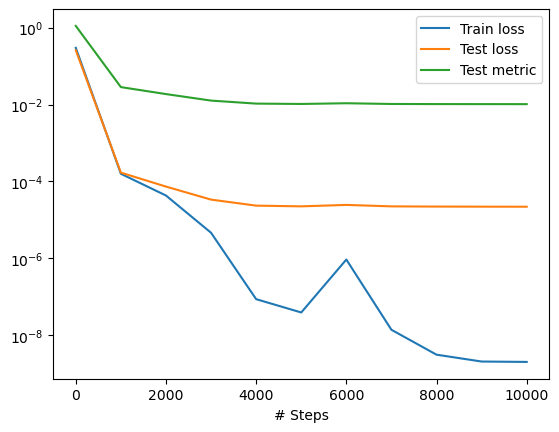

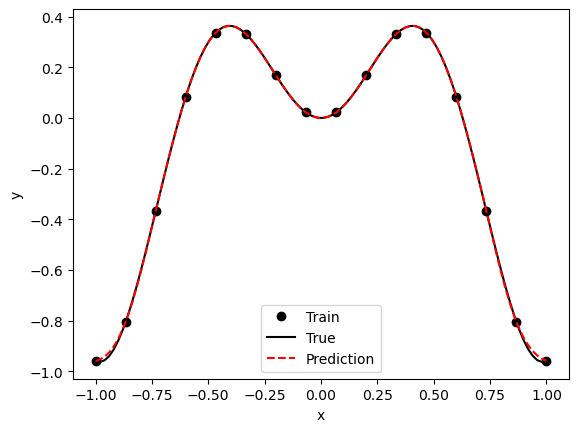

In [11]:
dde.saveplot(losshistory, train_state, issave=True, isplot=True)